In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 100
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_Base_TEST.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8


,Rule,Rule Count,Percent of Population
2,"F[0,0]((hr <= 0.000 | hr <= 0.000))",8,0.8
0,"G[0,0]((hr <= 0.000 & Pulse <= 0.000))",6,0.6
3,"((death >= 0.000) U[0,0] (mort <= 0.000))",6,0.6
4,"((death >= 0.000) U[0,0] (tte <= 0.000))",6,0.6
1,"F[0,0]((Pulse <= 0.000 -> hr <= 0.000))",4,0.4
5,"((n_evts >= 0.000) U[0,0] (tte <= 0.000))",4,0.4
6,"((tte >= 0.000) U[0,0] (death <= 0.000))",4,0.4
11,"F[0,0]((hr <= 0.000 -> Pulse <= 0.000))",4,0.4
12,"((mort >= 0.000) U[0,0] (mort <= 0.000))",4,0.4
13,"((n_evts <= 0.000) U[0,0] (tte >= 0.000))",4,0.4


## Load LDP Ruleset

In [4]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
0,"F[0,0]((hr = 0.000 & Pulse = 0.000))",1.0
24,"G[0,0]((hr < 0.000 & Pulse = 0.000))",1.0
26,"F[0,0]((Pulse = 0.000 -> hr = 0.000))",1.0
29,"G[0,0]((Pulse < 0.000 & hr < 0.000))",1.0
30,"G[0,0]((hr < 0.000 | hr = 0.000))",1.0
...,...,...
52,"((n_evts = 0.000) U[0,0] (hr = 0.000))",0.2
61,"((n_evts > 0.000) U[0,0] (hr = 0.000))",0.2
39,"((hr = 0.000) U[0,0] (hr = 0.000))",0.2
46,"((hr = 0.000) U[0,0] (n_evts = 0.000))",0.2


## Complexity Analysis

In [5]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

## Get Table of Structure Counts - Count of rules above threshold

In [13]:
covDF, countDF = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,15,73,0,1.0


In [7]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"F[0,0]((hr = 0.000 & Pulse = 0.000))","F[0,0]((Pulse <= 0.000 & hr <= 0.000))",1.0,0.2
1,"((tte = 0.000) U[0,0] (n_evts < 0.000))","((n_evts <= 0.000) U[0,0] (tte >= 0.000))",0.4,0.4
2,"((tte = 0.000) U[0,0] (death = 0.000))","((death >= 0.000) U[0,0] (tte <= 0.000))",1.0,0.6
3,"((tte < 0.000) U[0,0] (n_evts > 0.000))","((n_evts >= 0.000) U[0,0] (tte <= 0.000))",0.4,0.4
4,"((death = 0.000) U[0,0] (tte = 0.000))","((death >= 0.000) U[0,0] (tte <= 0.000))",1.0,0.6
...,...,...,...,...
68,"((tte = 0.000) U[0,0] (n_evts > 0.000))","((n_evts >= 0.000) U[0,0] (tte <= 0.000))",0.4,0.4
69,"F[0,0]((hr = 0.000 & Pulse < 0.000))","F[0,0]((Pulse <= 0.000 & hr <= 0.000))",1.0,0.2
70,"((tte < 0.000) U[0,0] (n_evts = 0.000))","((n_evts >= 0.000) U[0,0] (tte <= 0.000))",0.4,0.4
71,"((tte < 0.000) U[0,0] (death > 0.000))","((death >= 0.000) U[0,0] (tte <= 0.000))",0.6,0.6


## Get number of unique structure types

In [ ]:
# TODO - gonna need to do some type of matching here to make sure unique structs are matched ...

In [8]:
#get client trees from table
clTrees = cov.getClientTreesFromCountDF(countDF)

In [9]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(clTrees)
print("Total Unique Structures in Client Rules:", numUniqueStructs)

Total Unique Structures in Client Rules: 9


In [10]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(ldpTrees)
print("Total Unique Structures in LDP Rules:", numUniqueStructs)

Total Unique Structures in LDP Rules: 31


## Compare LDP Rules Found vs the Percent Client Counts 

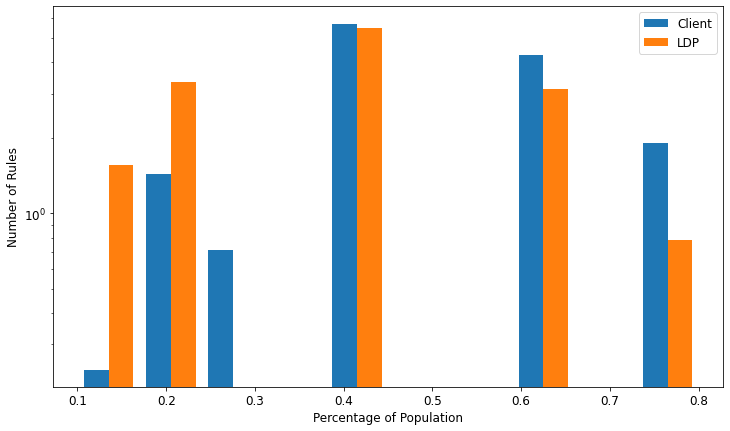

In [24]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()
